In [2]:
#importing necessary libraries
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Convolution2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen=ImageDataGenerator(rescale = 1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip= True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
x_train=train_datagen.flow_from_directory(r"D:\main_project\Nutrition_Image_Analysis\Dataset\TRAIN_SET",target_size=(64,64),batch_size=32,class_mode="categorical")
x_test=train_datagen.flow_from_directory(r"D:\main_project\Nutrition_Image_Analysis\Dataset\TEST_SET",target_size=(64,64),batch_size=32,class_mode="categorical")


Found 2626 images belonging to 5 classes.
Found 1055 images belonging to 5 classes.


In [6]:
x_train.class_indices

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

In [7]:
model=Sequential()

In [8]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3)))

In [9]:
model.add(MaxPooling2D((2,2)))

In [10]:
model.add(Flatten())

In [11]:
model.add(Dense(units=128, kernel_initializer="random_uniform",activation="relu"))

In [12]:
model.add(Dense(units=5, kernel_initializer="random_uniform",activation="softmax"))


In [13]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 3,937,925
Trainable params: 3,937,925
Non-trainable params: 0
______________________________________________

# compile the model


In [15]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


In [16]:
model.fit_generator(x_train,steps_per_epoch=82, epochs=10, validation_data=x_test,validation_steps=28)

C:\Users\akshara\AppData\Local\Temp\ipykernel_15836\1663788711.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=82, epochs=10, validation_data=x_test,validation_steps=28)


Epoch 1/10
82/82 [==============================] - 33s 332ms/step - loss: 0.4741 - accuracy: 0.8558 - val_loss: 0.2181 - val_accuracy: 0.8884
Epoch 2/10
82/82 [==============================] - 16s 200ms/step - loss: 0.0194 - accuracy: 0.9985 - val_loss: 0.1680 - val_accuracy: 0.9386
Epoch 3/10
82/82 [==============================] - 17s 202ms/step - loss: 0.0247 - accuracy: 0.9934 - val_loss: 0.4186 - val_accuracy: 0.8783
Epoch 4/10
82/82 [==============================] - 17s 202ms/step - loss: 0.0082 - accuracy: 0.9981 - val_loss: 0.0786 - val_accuracy: 0.9565
Epoch 5/10
82/82 [==============================] - 16s 201ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1373 - val_accuracy: 0.9475
Epoch 6/10
82/82 [==============================] - 16s 199ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.5286 - val_accuracy: 0.8839
Epoch 7/10
82/82 [==============================] - 17s 201ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.2661 - val_accuracy: 0.9174

In [17]:
model.save("nutrition.h5")

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
model= load_model("nutrition.h5")

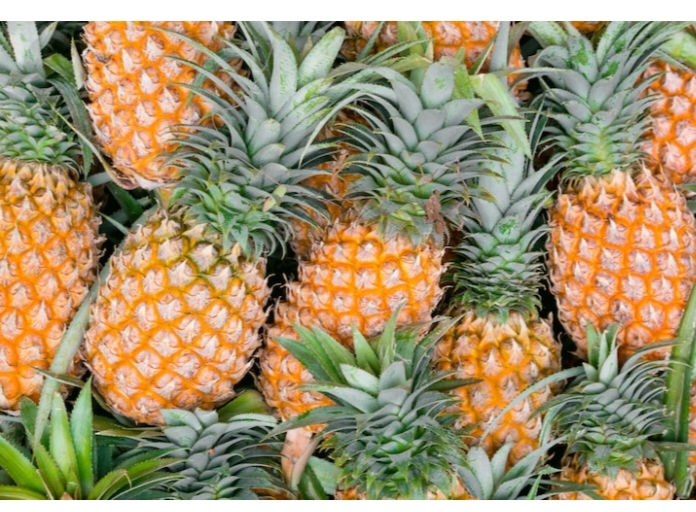

In [19]:
from IPython.display import Image
img=Image(filename=r"D:\main_project\Nutrition_Image_Analysis\sample_image\test_image1.jpg")
img

In [20]:
from tensorflow.keras.preprocessing import image
path2=r"D:\main_project\Nutrition_Image_Analysis\sample_image\test_image1.jpg"

img=image.load_img(path2,target_size=(64,64))

In [21]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
pred

1/1 [==============================] - 1s 1s/step


3

In [22]:
index=['APPLES','BANANA','ORANGE','PINEAPPLE','WATERMELON']
result=str(index[pred])
result

'PINEAPPLE'